# **Heart Attack Analysis & Prediction | Supervised Machine Learning**


#  Reading Data & First Glance

In [2]:
# updating scikit-learn
# !pip install scikit-learn --upgrade

#import libraries
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
# import data
url = "https://drive.google.com/file/d/1qvkCXkhZ54m8Su7n5BKPm9-1Mz4RlHsP/view?usp=share_link"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
heart = pd.read_csv(path)

In [4]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis

## 3.3.Data Cleaning

The purpose of data cleaning is to get our data ready to analyze and visualize.

### Check the missing values

In [5]:
# check if there are any Null values
heart.isnull().sum().sort_values(ascending=False).head(11)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
dtype: int64

In [8]:
# replace missing values with median
# heart = heart.fillna(heart.median())

**CONCLUSION**: As we can see here, there are no missing values in this case

### Check the duplicate rows

In [6]:
# check duplicated values
heart.duplicated().sum()

1

In [7]:
# drop duplicated values
heart.drop_duplicates(keep='first',inplace=True)

In [8]:
heart.duplicated().sum()

0

**CONCLUSION**: Now our data is clean.





## 3.6.Outliers and how to remove them

We will use the IQR (Inter-Quartile Range) method to detect outliners and then visualize them with the help of boxplots.

In [9]:
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=heart[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(heart)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.305%
Column chol outliers = 5 => 1.656%
Column thalachh outliers = 1 => 0.331%
Column oldpeak outliers = 8 => 2.649%


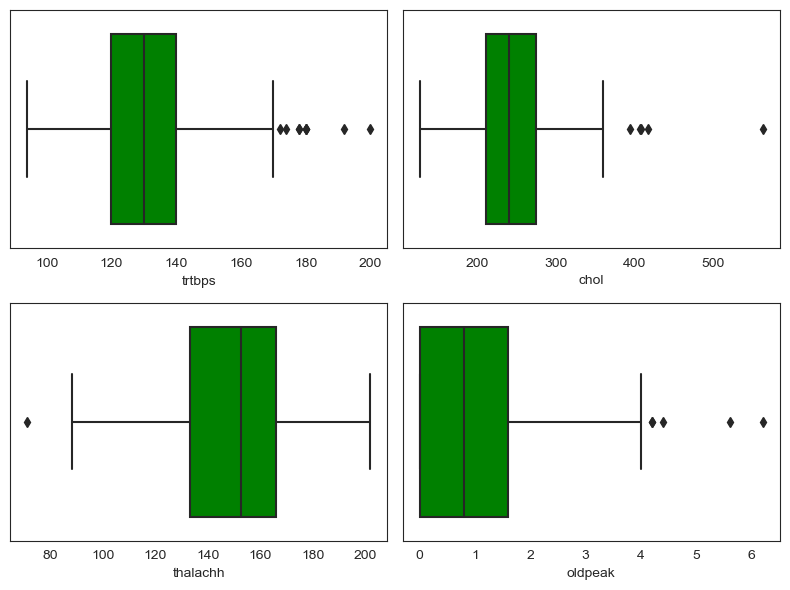

Outliers Present at position: 

trtbps: (array([  8, 101, 110, 152, 194, 202, 222, 227, 240, 247, 259, 265, 291]),)
chol: (array([ 28,  85,  96, 219, 245]),)
thalachh: (array([271]),)
oldpeak: (array([101, 203, 220, 249, 290]),)


In [10]:
sns.set_style("white")

fig, ax1 = plt.subplots(2,2, figsize=(8,6))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=heart,x=heart[continuous_cols[1:][k]],saturation=1,ax=ax1[i][j],color="green")
        k+=1
plt.tight_layout()
plt.show()

#Display the position of outliers
print("Outliers Present at position: \n")
print("trtbps: {}".format(np.where(heart['trtbps']>165)))
print("chol: {}".format(np.where(heart['chol']>360)))
print("thalachh: {}".format(np.where(heart['thalachh']<80)))
print("oldpeak: {}".format(np.where(heart['oldpeak']>4)))

Clearly, there arent many outliers but we still have to try to minimize them as much as we can. We can take the log of these columns to bring all values within a range and minimize the outliners.

In [14]:
#Using log transformation
# heart["trtbps"]= np.log(heart.trtbps)

# print("---Log Transform performed---")

In [11]:
#Outliers again
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=heart[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(heart)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

Column age outliers = 0 => 0.0%
Column trtbps outliers = 13 => 4.305%
Column chol outliers = 5 => 1.656%
Column thalachh outliers = 1 => 0.331%
Column oldpeak outliers = 8 => 2.649%


After performing the log transform a significant number of outliners was reduced as observed above.

### **Inferences So Far**

- The dataset contains 303 Rows and 14 Columns.
- We don’t have any missing values in the dataset.
- We could see that the data is right skewed for most of the features.
- There is no imbalance in the dataset. The distribution of the target column is balanced.

The EDA is not completed yet. We have to do some Data Visualization tasks to understand the data better.

# 5.Splitting Data into Training and Test Set

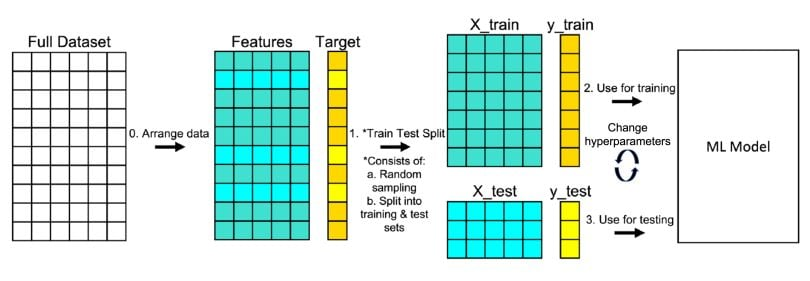

Let’s define our dependent and independent variables. 

- y: Dependent will be *Output*, because we want to predict whether athe Output is 0 or 1.

- X: Independent will be remaining variables. Given below is the code for the partition.

In [12]:
# Define X and Y
X = heart
y = X.pop("output")

Before splitting we will scale our data using the Standard scaler before using it for training our model.

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Feature Scaling / Standardizing the data
scaler = StandardScaler() # or MinMaxScaler()
X = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

# Data splitting (Train - Test)
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.20, random_state=0)

X = pd.DataFrame(X)

In [19]:
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (241, 13)
The shape of X_test is        (61, 13)
The shape of y_train is       (241,)
The shape of y_test is        (61,)


# 6.Creating Pipeline

In [15]:
# import libraries
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# creating categorical and numerical pipelines
X_cat_columns = X.select_dtypes(exclude="number").copy().columns
X_num_columns = X.select_dtypes(include="number").copy().columns


# create numerical pipeline, filling the missing values in numerical columns using SimpleImputer 
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"))
 
# create categorical pipeline, filling the missing values in categorical columns using SimpleImputer and OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
)

# define the preprocessing steps
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)

# 7.Applying algorithms

We will be applying some models on the data set and compare Accuracy Scores.

In [16]:
models = pd.DataFrame(columns=["Model","Accuracy Score"])

In [17]:
def compute(y_pred,y_test):

    #Output plot
    cm=confusion_matrix(y_test,y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Reds',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

## 6.8.Support Vector Classifier

In [18]:
# create a pipeline for the model
svc_pipeline = make_pipeline(preprocessor, 
                                       SVC(kernel='rbf')).set_output(transform='pandas')                                                                                                             

# fit the model on the training set
svc_pipeline.fit(X_train, y_train)

# predict on the test set for the model
svc_y_pred = svc_pipeline.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_y_pred)
print("Svc Accuracy: %", round((svc_accuracy*100),3))

Svc Accuracy: % 93.443


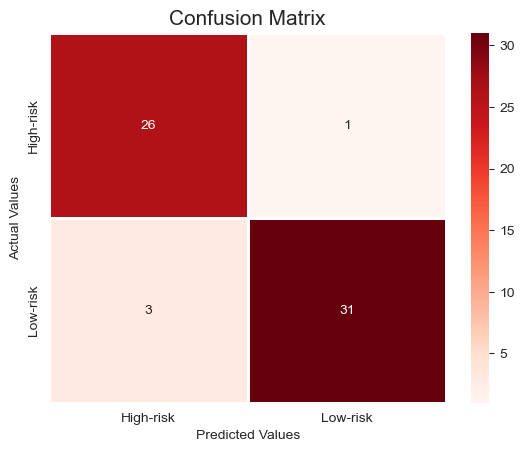

Precision: 0.969 
Recall: 0.912 
F1-Score: 0.939 
Accuracy: 93.443 %
Mean Square Error: 0.066


In [19]:
compute(svc_y_pred,y_test)

It shows SVC is the best fit for this dataset because the accuracy 93%. Let's try to increase the efficiency by Hyper tuning.

In [20]:
svc = SVC(kernel = 'rbf',C = 1, degree = 5, random_state = 0)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print("Accuracy:",accuracy_score(y_test,svc_pred))
print("Confusion matrix:\n",confusion_matrix(y_test,svc_pred))

Accuracy: 0.9344262295081968
Confusion matrix:
 [[26  1]
 [ 3 31]]


The accuracy remains same.

# 9.Conclusions

Most of the models are performing really well.

SVC is performing the best for the given dataset.

In [22]:
import pickle

pickle.dump(svc_pipeline, open('svc_model.pkl', 'wb'))